<a href="https://colab.research.google.com/github/ellaclauz/EXAMPLES_KNEARESTNEIGHBORS/blob/main/Wine_dataset_example_for_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's use this  [new dataset](https://archive.ics.uci.edu/ml/datasets/Wine) (data source: UCI Machine Learning Repository). The dataset contains the chemical composition of 178 different Italian wines. The classes are the grape species, called cultivars. There are three classes but let's just see whether we can tell Class 1 apart from the other two.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [4]:
data = pd.read_csv('wine.csv')
data.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Exploratory Data Analysis

In [5]:
data.shape

(178, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diulted wines  178 non-null    float64
 13  Proli

In [7]:
data["Class"].value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: Class, dtype: float64

**Binary prediction task:** Predict whether a wine is part of Class 1 or not

**Setup:** Create a Class 0 by grouping together Classes 2 and 3

**Endgame:** Predict whether a wine belongs to Class 1 or Class 0

In [8]:
def is_one(val):
  if val == 1:
    return 1
  else:
    return 0

In [9]:
data["Class_Target"] = data["Class"].apply(is_one)

In [10]:
data.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline,Class_Target
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [12]:
data["Class_Target"].value_counts(normalize=True)

0    0.668539
1    0.331461
Name: Class_Target, dtype: float64

Let's do some visualization to see if Class 1 looks different from Class 0. 

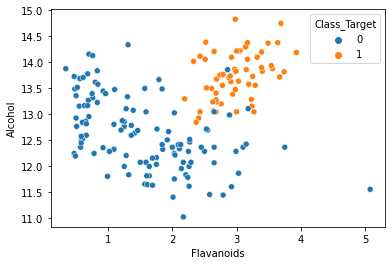

In [13]:
sns.scatterplot(x="Flavanoids", y="Alcohol", data=data, hue="Class_Target")
plt.show()

The Class 1 points are almost entirely separate from the Class 0 points. That is one indication of why the distance between two Class 1 wines would be smaller than the distance between wines of two different classes. We can see a similar phenomenon with a different pair of attributes too:

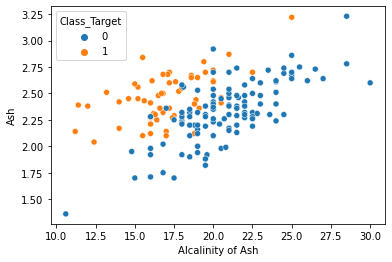

In [14]:
sns.scatterplot(x="Alcalinity of Ash", y="Ash", data=data, hue="Class_Target")
plt.show()

But for some pairs the visualization is more murky.

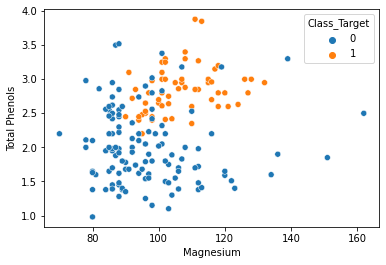

In [15]:
sns.scatterplot(x="Magnesium", y="Total Phenols", data=data, hue="Class_Target")
plt.show()

Let's see if we can implement a classifier based on all of the attributes. After that, we'll see how accurate it is.

## Training and Testing Split

### Isolate the `y` variable.
This is also known as the outcome variable / the target variable / the dependent variable. Essentially, this is the variable that you want to predict.

In [17]:
y = data["Class_Target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class_Target, dtype: int64

### Isolate the `X` variables.
Also known as the features / the independent variables. Essentially, these are the variables that you want to use to predict `y`.

In [18]:
X = data.drop(columns=["Class_Target", "Class"])

In [19]:
X.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of Ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total Phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color Intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diulted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [21]:
X.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue',
       'OD280/OD315 of diulted wines', 'Proline'],
      dtype='object')

### Split `X` and `y` into training and testing sets.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Check what the training and testing sets look like.

In [23]:
X_train.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
144,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280


In [24]:
X_test.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380


In [25]:
y_train.head()

19     1
135    0
74     0
144    0
16     1
Name: Class_Target, dtype: int64

In [26]:
y_test.head()

54     1
151    0
63     0
55     1
123    0
Name: Class_Target, dtype: int64

Check the shapes of the training and testing sets.

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

## Implement K-NN

### Create a `KNeighborsClassifier` object.

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)

### Fit the `KNeighborsClassifier` to the training data.

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Use the fitted `KNeighborsClassifier` to predict on the training set.

Get the predictions on the training set.

In [31]:
preds_train = knn.predict(X_train)

Check data types of the predictions and the true values for training set.

In [32]:
type(preds_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

How to compare predictions to true values for training set:

In [33]:
preds_train == y_train

19     False
135     True
74      True
144     True
16      True
       ...  
103     True
67      True
117     True
47      True
172     True
Name: Class_Target, Length: 133, dtype: bool

Compute accuracy of predictions for training set:

In [34]:
knn.score(X_train, y_train)

0.9548872180451128

### Use the fitted `KNeighborsClassifier` to predict on the testing set.

Get the predictions on the testing set.

In [35]:
preds_test = knn.predict(X_test)

What do the true values in the testing set look like:

In [36]:
preds_test

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0])

What do the true values in the testing set look like:

In [37]:
y_test

54     1
151    0
63     0
55     1
123    0
121    0
7      1
160    0
106    0
90     0
141    0
146    0
5      1
98     0
168    0
80     0
33     1
18     1
61     0
51     1
66     0
37     1
4      1
104    0
60     0
111    0
126    0
86     0
112    0
164    0
26     1
56     1
129    0
45     1
8      1
44     1
161    0
92     0
94     0
174    0
24     1
30     1
93     0
101    0
113    0
Name: Class_Target, dtype: int64

Compute accuracy of predictions for testing set: 

In [38]:
knn.score(X_test, y_test)

0.9111111111111111